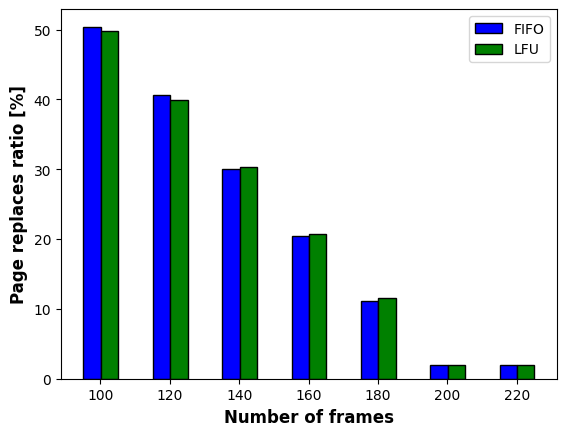

In [11]:
import numpy,os
from matplotlib import pyplot as plt
from fifo_lfu_simulation import fifo,lfu
from pages_generator import generate_pages

frames = [100,120,140,160,180,200,220]

fifo_page_replaces = []
lfu_page_replaces = []

generate_pages(10000,199)

pages_data = numpy.genfromtxt('fifo_lfu_simulation_input.txt')

file_path = os.path.abspath('')
results_file_path = os.path.join(file_path,'FIFO_LFU_results_raw.txt')
if os.path.exists(results_file_path):
    f = open('FIFO_LFU_results_raw.txt','r+')
    f.truncate(0)
    f.close()

for i in frames:                               
    timer_fifo,page_replaces_fifo = fifo(pages_data,i)
    timer_lfu,page_replaces_lfu = lfu(pages_data,i)
    with open('FIFO_LFU_results_raw.txt','a') as write_file:
        write_file.write(f"{i};{page_replaces_fifo};{page_replaces_lfu}")
        write_file.write('\n')
    fifo_page_replaces.append(round((page_replaces_fifo/timer_fifo)*100,2))
    lfu_page_replaces.append(round((page_replaces_lfu/timer_lfu)*100,2))

bar_width = 0.25

br1 = numpy.arange(len(fifo_page_replaces))
br2 = [x + bar_width for x in br1]

plt.bar(br1, fifo_page_replaces, color ='b', width = bar_width, 
        edgecolor ='black', label ='FIFO') 
plt.bar(br2, lfu_page_replaces, color ='g', width = bar_width, 
        edgecolor ='black', label ='LFU') 

plt.xlabel('Number of frames',fontweight='bold',fontsize=12)
plt.ylabel('Page replaces ratio [%]',fontweight='bold',fontsize=12)
plt.xticks([x + 0.12 for x in range(len(frames))],frames)

plt.legend()
plt.show()